Importo lo que me importa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Extract: Cargar los datos
def load_data():
    champions_df = pd.read_csv('TFT_Champion_CurrentVersion.csv')
    items_df = pd.read_csv('TFT_Item_CurrentVersion.csv')
    return champions_df, items_df

In [4]:
# Transform: Limpiar y preparar los datos
def transform_data(champions_df):
    # Convertir las columnas de listas en formato string a listas reales
    champions_df['class'] = champions_df['class'].apply(eval)
    
    # Crear columnas adicionales para análisis
    champions_df['num_classes'] = champions_df['class'].apply(len)
    
    return champions_df

In [5]:
def analyze_and_visualize(champions_df):
    # Configurar el estilo de seaborn
    sns.set_style("whitegrid")
    
    # 1. Distribución de costos de campeones
    plt.figure(figsize=(10, 6))
    sns.countplot(data=champions_df, x='cost')
    plt.title('Distribución de Costos de Campeones')
    plt.xlabel('Costo')
    plt.ylabel('Cantidad de Campeones')
    plt.savefig('cost_distribution.png')
    plt.close()
    
    # 2. Relación entre costo y DPS
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=champions_df, x='cost', y='dps')
    plt.title('Relación entre Costo y DPS')
    plt.xlabel('Costo')
    plt.ylabel('DPS')
    plt.savefig('cost_vs_dps.png')
    plt.close()
    
    # 3. Correlación entre estadísticas
    stats_cols = ['cost', 'health', 'defense', 'attack', 'dps']
    correlation_matrix = champions_df[stats_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación de Estadísticas')
    plt.savefig('correlation_matrix.png')
    plt.close()
    
    # 4. Top 10 campeones por DPS
    print("\nTop 10 Campeones por DPS:")
    print(champions_df.nlargest(10, 'dps')[['name', 'dps', 'cost']])
    
    # 5. Estadísticas promedio por costo
    print("\nEstadísticas promedio por costo:")
    print(champions_df.groupby('cost')[['health', 'defense', 'attack', 'dps']].mean())

In [6]:
# Extract
champions_df, items_df = load_data()

In [7]:

champions_df.head()

,name,cost,health,defense,attack,attack_range,speed_of_attack,dps,skill_name,skill_cost,origin,class
0,gangplank,5,1000,30,60,1,1.00,60,gangplank_orbitalstrike,100/175,Space Pirate,"['Mercenary', 'Demolitionist']"
1,graves,1,650,35,55,1,0.55,30,graves_smokegrenade,50/80,Space Pirate,['Blaster']
2,neeko,3,800,35,50,2,0.65,33,neeko_popblossom,75/150,Star Guardian,['Protector']
3,darius,2,750,35,60,1,0.65,39,darius_spacepirateguillotine,0/60,Space Pirate,['Mana-Reaver']
4,rakan,2,600,35,45,2,0.70,32,rakan_grandentrance,50/100,Celestial,['Protector']


In [8]:
champions_df.tail()

,name,cost,health,defense,attack,attack_range,speed_of_attack,dps,skill_name,skill_cost,origin,class
47,caitlyn,1,500,20,45,5,0.75,34,caitlyn_aceinthehole,0/125,Chrono,['Sniper']
48,kayle,4,700,25,60,3,0.80,48,kayle_ascend,0/60,Valkyrie,['Blademaster']
49,twistedfate,1,500,20,40,3,0.70,28,twistedfate_wildcards,0/75,Chrono,['Sorcerer']
50,fiora,1,450,30,45,1,1.00,45,fiora_reposte,0/85,Cybernetic,['Blademaster']
51,fizz,4,600,25,60,1,0.80,48,fizz_chumthewaters,80/150,Mech-Pilot,['Infiltrator']


In [9]:
champions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             52 non-null     object 
 1   cost             52 non-null     int64  
 2   health           52 non-null     int64  
 3   defense          52 non-null     int64  
 4   attack           52 non-null     int64  
 5   attack_range     52 non-null     int64  
 6   speed_of_attack  52 non-null     float64
 7   dps              52 non-null     int64  
 8   skill_name       52 non-null     object 
 9   skill_cost       52 non-null     object 
 10  origin           52 non-null     object 
 11  class            52 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ KB


In [12]:
items_df


,id,name
0,1,B.F. Sword
1,2,Recurve Bow
2,3,Needlessly Large Rod
3,4,Tear of the Goddess
4,5,Chain Vest
5,6,Negatron Cloak
6,7,Giant's Belt
7,8,Spatula
8,9,Sparring Gloves
9,11,Deathblade


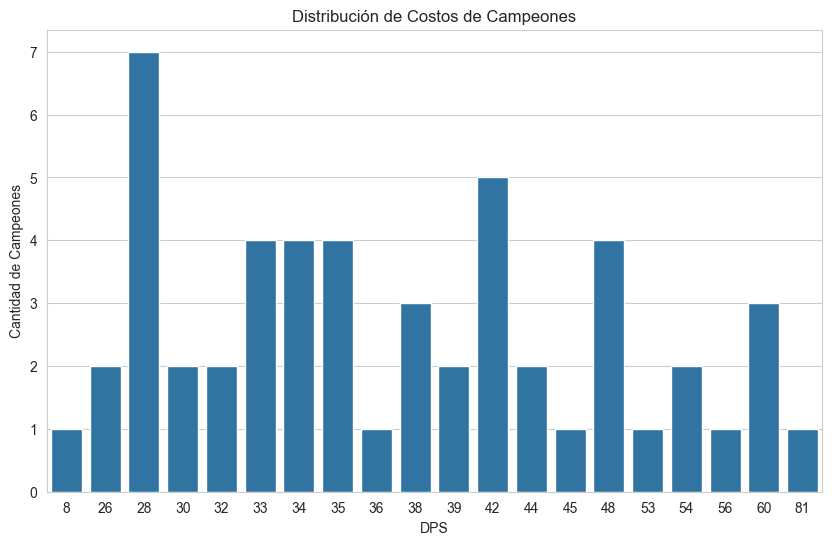

In [16]:
# Visualizaciones
sns.set_style("whitegrid")

# 1. Distribución de costos de campeones
plt.figure(figsize=(10, 6))
sns.countplot(data=champions_df, x='dps')
plt.title('Distribución de Costos de Campeones')
plt.xlabel('DPS')
plt.ylabel('Cantidad de Campeones')
plt.show()


In [17]:
# busca el campeon con el dps mas alto
champions_df.nlargest(10, 'dps')[['name', 'dps', 'cost']]

,name,dps,cost
40,jhin,81,4
0,gangplank,60,5
13,missfortune,60,5
32,irelia,60,4
18,shaco,56,3
30,ekko,54,5
36,xerath,54,5
41,jinx,53,4
24,thresh,48,5
28,ashe,48,3
